#### [ 이미지 변환 - 회전 및 대칭 ]
- 데이터 부족시 데이터 증가를 위해서 사용함
- 대칭 : 좌우상하 flip()
- 회전 : 지정된 각도로 돌리기 getRotationMatrix2D()

[1] 모듈 로딩 및 데이터 준비 <hr>

In [1]:
## [1-1] 모듈 로딩
import cv2                           # 컴퓨터비젼 모듈
import numpy as np                   # 이미지 데이터 저장 모듈
import matplotlib.pyplot as plt      # 시각화 모듈
import os                            # 파일, 폴더, 경로 관련 모듈

In [2]:
## [1-2] 데이터 준비
IMG_DIR  = '../data/image/'
FILENAME = 'cat.jpg'

[2] 이미지 로딩<hr>

In [3]:
## 로딩 : 경로+파일명 
colorIMG=cv2.imread(IMG_DIR+FILENAME, cv2.IMREAD_COLOR)

In [4]:
## 정보확인
if colorIMG is None:
    print(f"{colorIMG} :이미지 체크")
else:
    print(f'{FILENAME}')
    print(f'형태:{colorIMG.shape}    차원:{colorIMG.ndim}D')

## 이미지 형태 : (행,  열, 채널)

cat.jpg
형태:(168, 299, 3)    차원:3D


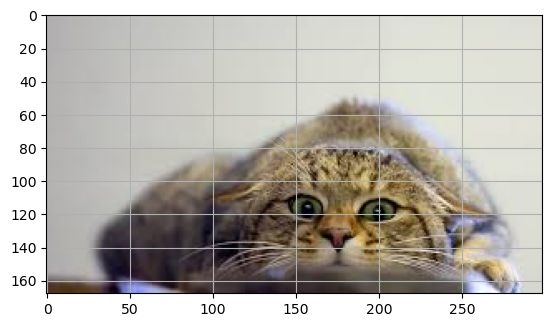

In [5]:
## 이미지 확인 
rgbIMG = cv2.cvtColor(colorIMG, cv2.COLOR_BGR2RGB)  # BGR 채널 순서 => RGB 채널 순서

plt.imshow(rgbIMG)
plt.grid()
plt.show()

[3] 이미지 좌우상하 대칭<hr>

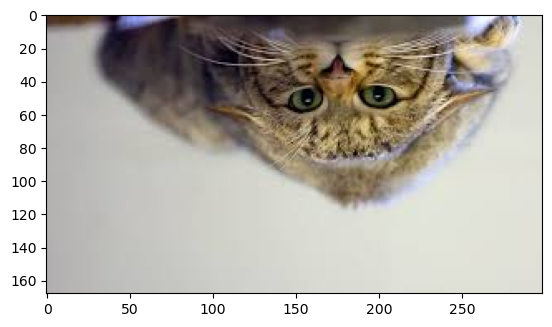

In [6]:
## 상하대칭
top_downIMG = cv2.flip(colorIMG, 0)

plt.imshow( cv2.cvtColor(top_downIMG , cv2.COLOR_BGR2RGB) )
plt.show()

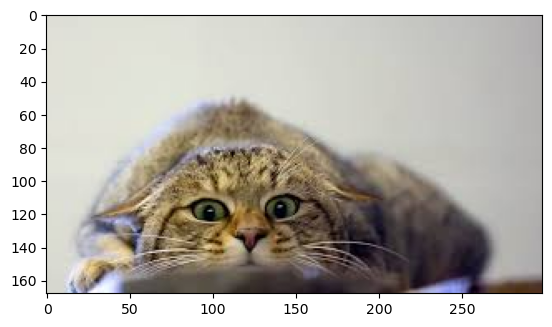

In [7]:
## 좌우대칭
left_rightIMG = cv2.flip(colorIMG, 1)

plt.imshow( cv2.cvtColor(left_rightIMG , cv2.COLOR_BGR2RGB) )
plt.show()

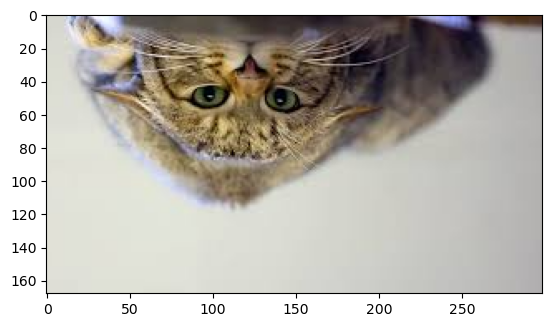

In [8]:
## 상하좌우대칭
udlrIMG = cv2.flip(colorIMG, -1)

plt.imshow( cv2.cvtColor(udlrIMG , cv2.COLOR_BGR2RGB) )
plt.show()

[4] 이미지 회전<hr>
- 회전행열 추출 단계 : getRotationMatrix2D(중심좌표, 회전각도, 확대/축소배율)
- 변화 단계 : warpAffine(원본이미지, 회전행렬, (행, 열))

In [9]:
## [4-1] 회전행열 추출 
H, W, _ = colorIMG.shape

rm45=cv2.getRotationMatrix2D((W/2, H/2), 45, 1.0)

print(f'rm45 :{rm45.shape}')

rm45 :(2, 3)


rm45IMG :(168, 299, 3)


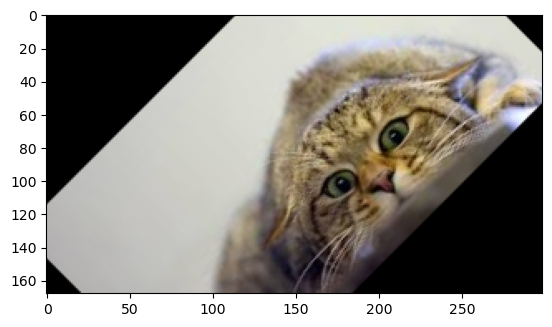

In [10]:
## [4-2] 이미지 변환
rm45IMG=cv2.warpAffine(colorIMG, rm45, (W,H))
print(f'rm45IMG :{rm45IMG.shape}')

plt.imshow( cv2.cvtColor(rm45IMG , cv2.COLOR_BGR2RGB) )
plt.show()

In [13]:
H, W, _ = colorIMG.shape
imgDatas=[]
for angle in range(0,361,30):
    N_FILE = f'{IMG_DIR}{angle:03}_{FILENAME}'
    angleIMG=cv2.warpAffine(colorIMG, cv2.getRotationMatrix2D((W/2, H/2), angle, 0.7), (W,H))
    cv2.imwrite(N_FILE, angleIMG)
    imgDatas.append(cv2.cvtColor(angleIMG, cv2.COLOR_BGR2RGB))


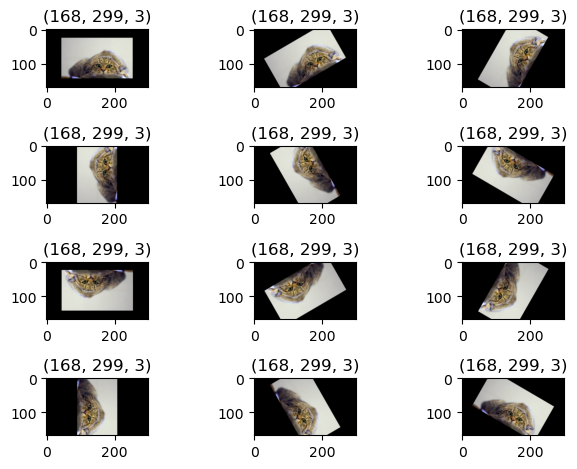

In [14]:
## 시각화 
import utils

utils.drawImage(4,3,imgDatas)
